In [1]:
#https://automating-gis-processes.github.io/CSC/notebooks/L5/raster-mosaic.html

In [2]:

import rasterio
from rasterio.merge import merge
from rasterio.plot import show
from rasterio import plot
import glob
import os
%matplotlib inline

In [3]:
# File and folder paths
dirpath = (r"D:\SwimmingPoolProject\data\NAIP_SI")
out_fp = os.path.join(dirpath, "SI_Mosaic.tif")
NDWI = os.path.join(dirpath, "SI_NDWI_Mosaic.tif")

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

### NAIP 

In [5]:
files_to_mosaic = [r'D:\SwimmingPoolProject\data\NAIP_SI\m_4007423_se_18_1_20170826\m_4007423_se_18_1_20170826.tif',
                   r'D:\SwimmingPoolProject\data\NAIP_SI\m_4007423_sw_18_1_20170826\m_4007423_sw_18_1_20170826.tif',
                   r'D:\SwimmingPoolProject\data\NAIP_SI\m_4007424_se_18_1_20170826\m_4007424_se_18_1_20170826.tif',
                   r'D:\SwimmingPoolProject\data\NAIP_SI\m_4007424_sw_18_1_20170826\m_4007424_sw_18_1_20170826.tif',
                   r'D:\SwimmingPoolProject\data\NAIP_SI\m_4007430_se_18_1_20170826\m_4007430_se_18_1_20170826.tif',
                   r'D:\SwimmingPoolProject\data\NAIP_SI\m_4007431_ne_18_1_20170826\m_4007431_ne_18_1_20170826.tif',
                   r'D:\SwimmingPoolProject\data\NAIP_SI\m_4007431_nw_18_1_20170826\m_4007431_nw_18_1_20170826.tif',
                   r'D:\SwimmingPoolProject\data\NAIP_SI\m_4007431_se_18_1_20170826\m_4007431_se_18_1_20170826.tif',
                   r'D:\SwimmingPoolProject\data\NAIP_SI\m_4007431_sw_18_1_20170826\m_4007431_sw_18_1_20170826.tif',
                   r'D:\SwimmingPoolProject\data\NAIP_SI\m_4007432_ne_18_1_20170826\m_4007432_ne_18_1_20170826.tif',
                   r'D:\SwimmingPoolProject\data\NAIP_SI\m_4007432_nw_18_1_20170826\m_4007432_nw_18_1_20170826.tif',
                   r'D:\SwimmingPoolProject\data\NAIP_SI\m_4007432_sw_18_1_20170826\m_4007432_sw_18_1_20170826.tif',
                   r'D:\SwimmingPoolProject\data\NAIP_SI\m_4007438_ne_18_1_20170826\m_4007438_ne_18_1_20170826.tif',
                   r'D:\SwimmingPoolProject\data\NAIP_SI\m_4007439_nw_18_1_20170826\m_4007439_nw_18_1_20170826.tif'
]

In [6]:
files_string = " ".join(files_to_mosaic)
print(files_string)

D:\SwimmingPoolProject\data\NAIP_SI\m_4007423_se_18_1_20170826\m_4007423_se_18_1_20170826.tif D:\SwimmingPoolProject\data\NAIP_SI\m_4007423_sw_18_1_20170826\m_4007423_sw_18_1_20170826.tif D:\SwimmingPoolProject\data\NAIP_SI\m_4007424_se_18_1_20170826\m_4007424_se_18_1_20170826.tif D:\SwimmingPoolProject\data\NAIP_SI\m_4007424_sw_18_1_20170826\m_4007424_sw_18_1_20170826.tif D:\SwimmingPoolProject\data\NAIP_SI\m_4007430_se_18_1_20170826\m_4007430_se_18_1_20170826.tif D:\SwimmingPoolProject\data\NAIP_SI\m_4007431_ne_18_1_20170826\m_4007431_ne_18_1_20170826.tif D:\SwimmingPoolProject\data\NAIP_SI\m_4007431_nw_18_1_20170826\m_4007431_nw_18_1_20170826.tif D:\SwimmingPoolProject\data\NAIP_SI\m_4007431_se_18_1_20170826\m_4007431_se_18_1_20170826.tif D:\SwimmingPoolProject\data\NAIP_SI\m_4007431_sw_18_1_20170826\m_4007431_sw_18_1_20170826.tif D:\SwimmingPoolProject\data\NAIP_SI\m_4007432_ne_18_1_20170826\m_4007432_ne_18_1_20170826.tif D:\SwimmingPoolProject\data\NAIP_SI\m_4007432_nw_18_1_201708

In [7]:

# List for the source files
src_files_to_mosaic = []

In [8]:
for fp in files_to_mosaic:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)


In [9]:
src_files_to_mosaic

[<open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007423_se_18_1_20170826/m_4007423_se_18_1_20170826.tif' mode='r'>,
 <open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007423_sw_18_1_20170826/m_4007423_sw_18_1_20170826.tif' mode='r'>,
 <open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007424_se_18_1_20170826/m_4007424_se_18_1_20170826.tif' mode='r'>,
 <open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007424_sw_18_1_20170826/m_4007424_sw_18_1_20170826.tif' mode='r'>,
 <open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007430_se_18_1_20170826/m_4007430_se_18_1_20170826.tif' mode='r'>,
 <open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007431_ne_18_1_20170826/m_4007431_ne_18_1_20170826.tif' mode='r'>,
 <open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007431_nw_18_1_20170826/m_4007431_nw_18_1_20170826.tif' mode='r'>,
 <open DatasetReader name='D:/SwimmingPoolProject/data/NAIP_SI/m_4007

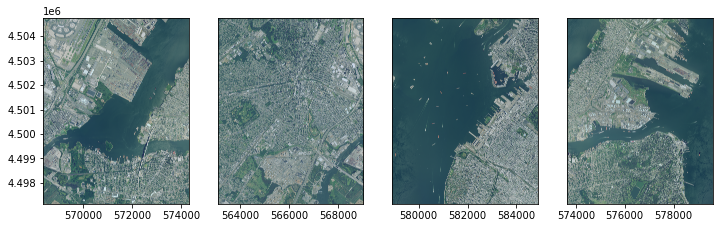

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create 4 plots next to each other
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(12, 4))

# Plot first four files
show(src_files_to_mosaic[0], ax=ax1)
show(src_files_to_mosaic[1], ax=ax2)
show(src_files_to_mosaic[2], ax=ax3)
show(src_files_to_mosaic[3], ax=ax4)

# Do not show y-ticks values in last three axis
for ax in [ax2, ax3, ax4]:
    ax.yaxis.set_visible(False)

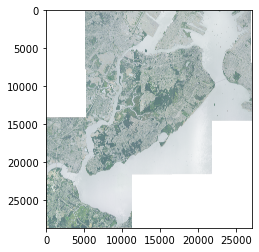

<AxesSubplot:>

In [11]:

# Merge function returns a single mosaic array and the transformation info
mosaic, out_trans = merge(src_files_to_mosaic)

# Plot the result
show(mosaic, cmap='terrain')

In [12]:

# Copy the metadata
out_meta = src.meta.copy()

# Update the metadata
out_meta.update({"driver": "GTiff",
                 "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                 "transform": out_trans
                 }
                )

In [13]:
#Write the mosaic raster to disk
with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(mosaic)

In [14]:
#How to do NDVI
#https://automating-gis-processes.github.io/site/master/notebooks/Raster/raster-map-algebra.html

In [15]:
raster = rasterio.open(out_fp)

78.91221067149559
85.89175186999746
<class 'numpy.ndarray'>


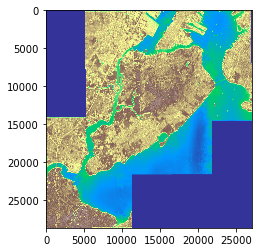

<AxesSubplot:>

In [16]:
# Read red channel (channel number 3)
red = raster.read(3)
# Read NIR channel (channel number 4)
nir = raster.read(4)

# Calculate some stats to check the data
print(red.mean())
print(nir.mean())
print(type(nir))

# Visualize
show(nir, cmap='terrain')

In [17]:
# Convert to floats
red = red.astype('f4')
nir = nir.astype('f4')
nir

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [19]:
# Calculate NDVI using numpy arrays
ndvi = (nir - red) / (nir + red)

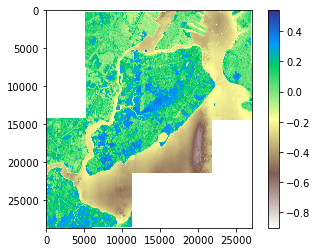

In [20]:
%matplotlib inline
# Plot the NDVI
plt.imshow(ndvi, cmap='terrain_r')
# Add colorbar to show the index
plt.colorbar()

In [21]:
#NDWI

76.61329752498679
85.89175186999746
<class 'numpy.ndarray'>


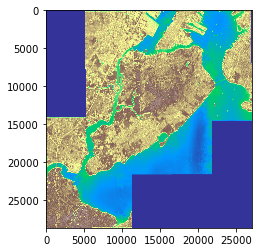

<AxesSubplot:>

In [22]:
# Read red channel (channel number 3)
green = raster.read(2)
# Read NIR channel (channel number 4)
nir = raster.read(4)

# Calculate some stats to check the data
print(green.mean())
print(nir.mean())
print(type(nir))

# Visualize
show(nir, cmap='terrain')

In [23]:
# Convert to floats
green = green.astype('f4')
nir = nir.astype('f4')
nir

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [25]:
# Calculate NDVI using numpy arrays
ndwi = (green - nir) / (green + nir)

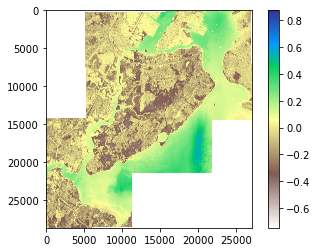

In [26]:
%matplotlib inline
# Plot the NDVI
plt.imshow(ndwi, cmap='terrain_r')
# Add colorbar to show the index
plt.colorbar()

In [27]:
#Write the mosaic raster to disk(NDWI)
with rasterio.open(NDWI, "w", **out_meta) as dest:
    dest.write(ndwi)

ValueError: Source shape (28605, 27056) is inconsistent with given indexes 4

In [32]:
#red = mosaic.read(3)

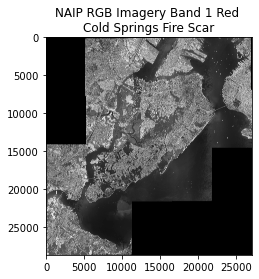

In [33]:
fig, ax = plt.subplots()

ax.imshow(mosaic[0], 
          cmap="Greys_r")

ax.set_title("NAIP RGB Imagery Band 1 Red \nCold Springs Fire Scar")

plt.show()

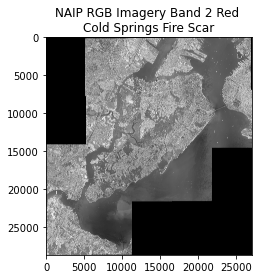

In [34]:
fig, ax = plt.subplots()

ax.imshow(mosaic[1], 
          cmap="Greys_r")

ax.set_title("NAIP RGB Imagery Band 2 Red \nCold Springs Fire Scar")

plt.show()

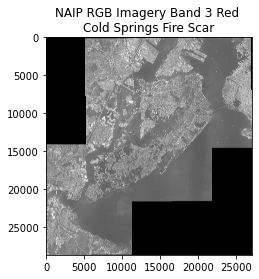

In [35]:
fig, ax = plt.subplots()

ax.imshow(mosaic[2], 
          cmap="Greys_r")

ax.set_title("NAIP RGB Imagery Band 3 Red \nCold Springs Fire Scar")

plt.show()

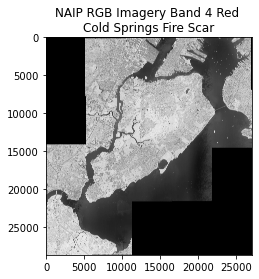

In [36]:
fig, ax = plt.subplots()

ax.imshow(mosaic[3], 
          cmap="Greys_r")

ax.set_title("NAIP RGB Imagery Band 4 Red \nCold Springs Fire Scar")

plt.show()

In [37]:
#https://www.youtube.com/watch?v=dw2aNRvC5Ts&t=324s

In [38]:
mosaic_Green = mosaic[1]

In [39]:
mosaic_Green.height

AttributeError: 'numpy.ndarray' object has no attribute 'height'

In [ ]:
plot.show(mosaic_Green)

In [ ]:
mosaic_Green.dtypes

In [ ]:
mosaic_NIR = mosaic[3]

In [ ]:
mosaic_Green.transform

In [ ]:
mosaic_Green.read()

In [ ]:
### DEM 

In [ ]:
files_to_mosaic_DEM = [r'D:\SwimmingPoolProject\data\tiff\DEM\be_NYC_001.tif',
                   r'D:\SwimmingPoolProject\data\tiff\DEM\be_NYC_002.tif',
                   r'D:\SwimmingPoolProject\data\tiff\DEM\be_NYC_004.tif',
                   r'D:\SwimmingPoolProject\data\tiff\DEM\be_NYC_005.tif',
                   r'D:\SwimmingPoolProject\data\tiff\DEM\be_NYC_006.tif',
                   r'D:\SwimmingPoolProject\data\tiff\DEM\be_NYC_007.tif',
                   r'D:\SwimmingPoolProject\data\tiff\DEM\be_NYC_008.tif',
                   r'D:\SwimmingPoolProject\data\tiff\DEM\be_NYC_009.tif',
                   r'D:\SwimmingPoolProject\data\tiff\DEM\be_NYC_012.tif',
                   r'D:\SwimmingPoolProject\data\tiff\DEM\be_NYC_013.tif',
                   r'D:\SwimmingPoolProject\data\tiff\DEM\be_NYC_014.tif'
]

In [ ]:
files_string_DEM = " ".join(files_to_mosaic)
print(files_string_DEM)

In [ ]:
# List for the source files
src_files_to_mosaic_DEM = []

In [ ]:
for fp in files_to_mosaic_DEM:
    src = rasterio.open(fp)
    src_files_to_mosaic_DEM.append(src)


In [ ]:
src_files_to_mosaic_DEM

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create 4 plots next to each other
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(12, 4))

# Plot first four files
show(src_files_to_mosaic_DEM[0], ax=ax1)
show(src_files_to_mosaic_DEM[1], ax=ax2)
show(src_files_to_mosaic_DEM[2], ax=ax3)
show(src_files_to_mosaic_DEM[3], ax=ax4)

# Do not show y-ticks values in last three axis
for ax in [ax2, ax3, ax4]:
    ax.yaxis.set_visible(False)

In [ ]:
# Merge function returns a single mosaic array and the transformation info
mosaic, out_trans = merge(src_files_to_mosaic_DEM)

# Plot the result
show(mosaic, cmap='terrain')

In [ ]:
# Merge function returns a single mosaic array and the transformation info
mosaic, out_trans = merge(src_files_to_mosaic_DEM)

# Plot the result
show(mosaic)

In [ ]:
### DSM 

In [ ]:
files_to_mosaic_DSM = [r'D:\SwimmingPoolProject\data\tiff\DSM\hh_NYC_001.tif',
                       r'D:\SwimmingPoolProject\data\tiff\DSM\hh_NYC_002.tif',
                       r'D:\SwimmingPoolProject\data\tiff\DSM\hh_NYC_004.tif',
                       r'D:\SwimmingPoolProject\data\tiff\DSM\hh_NYC_005.tif',
                       r'D:\SwimmingPoolProject\data\tiff\DSM\hh_NYC_006.tif',
                       
                      
                      
                       r'D:\SwimmingPoolProject\data\tiff\DSM\hh_NYC_012.tif',
                       r'D:\SwimmingPoolProject\data\tiff\DSM\hh_NYC_013.tif'
                    
]

In [ ]:
files_string_DSM = " ".join(files_to_mosaic_DSM)
print(files_string_DSM)

In [ ]:
# List for the source files
src_files_to_mosaic_DSM = []

In [ ]:
for fp in files_to_mosaic_DSM:
    src = rasterio.open(fp)
    src_files_to_mosaic_DSM.append(src)


In [ ]:
src_files_to_mosaic_DSM

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create 4 plots next to each other
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(12, 4))

# Plot first four files
show(src_files_to_mosaic_DSM[0], ax=ax1)
show(src_files_to_mosaic_DSM[1], ax=ax2)
show(src_files_to_mosaic_DSM[2], ax=ax3)
show(src_files_to_mosaic_DSM[3], ax=ax4)

# Do not show y-ticks values in last three axis
for ax in [ax2, ax3, ax4]:
    ax.yaxis.set_visible(False)

In [ ]:
# Merge function returns a single mosaic array and the transformation info
mosaic, out_trans = merge(src_files_to_mosaic_DEM)

# Plot the result
show(mosaic, cmap='terrain')